# 0.5 - Context

In [1]:
# Import to be able to import python package from src
import sys
sys.path.insert(0, '../../src')

In [2]:
import pandas as pd
import numpy as np
from darts.datasets import AirPassengersDataset, AusBeerDataset, AustralianTourismDataset
import ontime as on

The `LightGBM` module could not be imported. To enable LightGBM support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
The `Prophet` module could not be imported. To enable Prophet support in Darts, follow the detailed instructions in the installation guide: https://github.com/unit8co/darts/blob/master/INSTALL.md
/Users/fred.montet/Library/Caches/pypoetry/virtualenvs/ontime-FpQu8-YN-py3.10/lib/python3.10/site-packages/statsforecast/core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## Load test data

In [3]:
s1 = AirPassengersDataset().load()
s2 = AusBeerDataset().load()

In [4]:
train = s2[:200]
test = s2[200:]

## Common Context

### Generic Predictor

In [5]:
gp = on.context.common.GenericPredictor()
gp.fit(train);

In [6]:
pred = gp.predict(len(test))

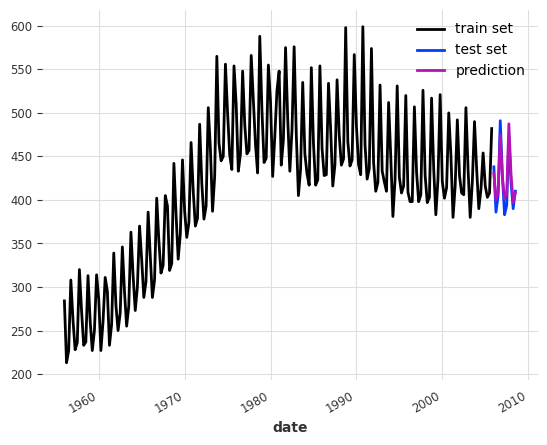

In [7]:
train.plot(label='train set')
test.plot(label='test set')
pred.plot(label='prediction');

### Generic Detector

In [11]:
gd = on.context.common.GenericDetector()
gd.fit(train);

In [13]:
detected_train = gd.detect(train)
detected_test = gd.detect(test)
predetected = gd.predetect(10)

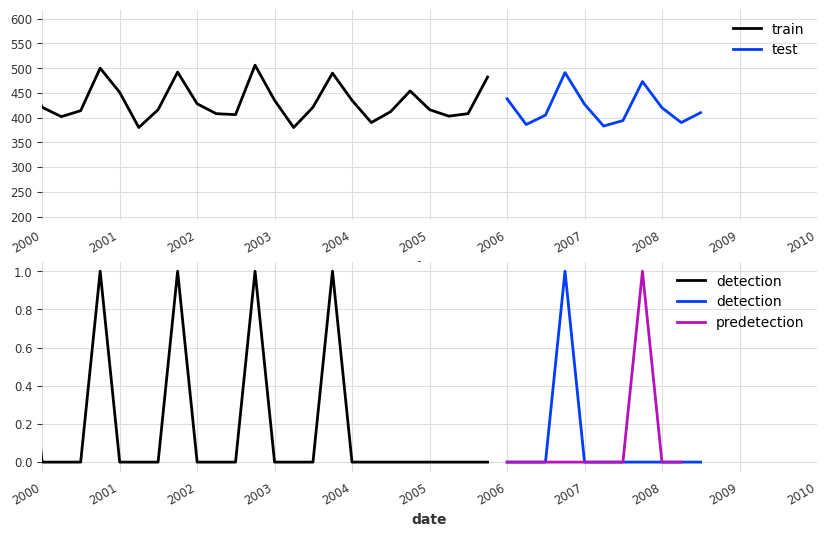

In [15]:
import matplotlib.pyplot as plt
import datetime

fig, ax = plt.subplots(2, figsize=(10, 6))

train.plot(ax=ax[0], label='train')
test.plot(ax=ax[0], label='test')
ax[0].set_xlim([datetime.date(2000, 1, 1), datetime.date(2010, 1, 1)])

detected_train.plot(ax=ax[1], label='detection')
detected_test.plot(ax=ax[1], label='detection')
predetected.plot(ax=ax[1], label='predetection')

ax[1].set_xlim([datetime.date(2000, 1, 1), datetime.date(2010, 1, 1)]);